In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pickle

# Preparing The Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pickle_in = open("/content/drive/MyDrive/petskindata/X_train_cropped.pickle","rb")
X=pickle.load(pickle_in)
pickle_in = open("/content/drive/MyDrive/petskindata/y_train_cropped.pickle","rb")
y=pickle.load(pickle_in)
pickle_in = open("/content/drive/MyDrive/petskindata/X_test_cropped.pickle","rb")
X_test=pickle.load(pickle_in)
pickle_in = open("/content/drive/MyDrive/petskindata/y_test_cropped.pickle","rb")
y_test=pickle.load(pickle_in)

In [4]:
print(X[0], y[0], X_test[0], y_test[0])

[[[123 118 112]
  [137 132 128]
  [124 118 113]
  ...
  [137  96  68]
  [136  95  67]
  [135  92  66]]

 [[122 114 107]
  [138 130 124]
  [109 100  94]
  ...
  [131  91  65]
  [127  87  60]
  [127  85  60]]

 [[125 115 107]
  [150 140 132]
  [115 103  96]
  ...
  [117  79  55]
  [115  77  51]
  [118  78  53]]

 ...

 [[152 123 107]
  [101  72  56]
  [158 129 111]
  ...
  [131 118 109]
  [115 103  92]
  [137 128 118]]

 [[155 127 112]
  [131 102  86]
  [125  96  78]
  ...
  [ 92  80  71]
  [109  99  90]
  [154 145 137]]

 [[134 106  91]
  [136 107  91]
  [119  90  72]
  ...
  [106  95  88]
  [123 112 105]
  [158 150 143]]] 2 [[[203 175 164]
  [208 178 168]
  [216 185 175]
  ...
  [216 191 188]
  [213 192 189]
  [208 187 184]]

 [[202 171 161]
  [208 177 167]
  [212 180 171]
  ...
  [204 179 175]
  [202 181 176]
  [208 187 182]]

 [[204 171 162]
  [207 174 166]
  [215 182 173]
  ...
  [209 185 179]
  [209 189 182]
  [216 196 189]]

 ...

 [[196 161 155]
  [199 165 159]
  [201 168 161]
  

In [5]:
class_names = ["A1_구진_플라크","A2_비듬_각질_상피성잔고리","A3_태선화_과다색소침착","A4_농포_여드름","A5_미란_궤양","A6_결절_종괴"]

In [6]:
class_names[y[0]]

'A3_태선화_과다색소침착'

In [7]:
y=np.array(y)
y_test=np.array(y_test)

# Training The Model


In [8]:
xception_model = Sequential()

pretrained_model= tf.keras.applications.Xception(include_top=False,
                   input_shape=(100,100,3),
                   pooling='avg',classes=6,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

xception_model.add(pretrained_model)
xception_model.add(Flatten())
xception_model.add(Dense(512, activation='relu'))
xception_model.add(Dense(6, activation='softmax'))

83683744/83683744 [==============================] - 5s 0us/step


In [9]:
xception_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 6)                3078      
 pper)                                                           
                                                                 
Total params: 21,913,646
Trainable params: 1,052,166
Non-trainable params: 20,861,480
____________________________________

In [10]:
xception_model.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
epochs=30
history = xception_model.fit(X,y, epochs=epochs, validation_split=0.2)

Epoch 1/30
1330/1330 [==============================] - 61s 36ms/step - loss: 2.2202 - accuracy: 0.3307 - val_loss: 1.5584 - val_accuracy: 0.3832
Epoch 2/30
1330/1330 [==============================] - 47s 36ms/step - loss: 1.5558 - accuracy: 0.3776 - val_loss: 1.5582 - val_accuracy: 0.3739
Epoch 3/30
1330/1330 [==============================] - 48s 36ms/step - loss: 1.5391 - accuracy: 0.3853 - val_loss: 1.5510 - val_accuracy: 0.3810
Epoch 4/30
1330/1330 [==============================] - 49s 37ms/step - loss: 1.5320 - accuracy: 0.3883 - val_loss: 1.5283 - val_accuracy: 0.3904
Epoch 5/30
1330/1330 [==============================] - 48s 36ms/step - loss: 1.5247 - accuracy: 0.3936 - val_loss: 1.5313 - val_accuracy: 0.3860
Epoch 6/30
1330/1330 [==============================] - 49s 37ms/step - loss: 1.5150 - accuracy: 0.3978 - val_loss: 1.5306 - val_accuracy: 0.3862
Epoch 7/30
1330/1330 [==============================] - 46s 35ms/step - loss: 1.5090 - accuracy: 0.4017 - val_loss: 1.5374 -

# Evaluating The Model

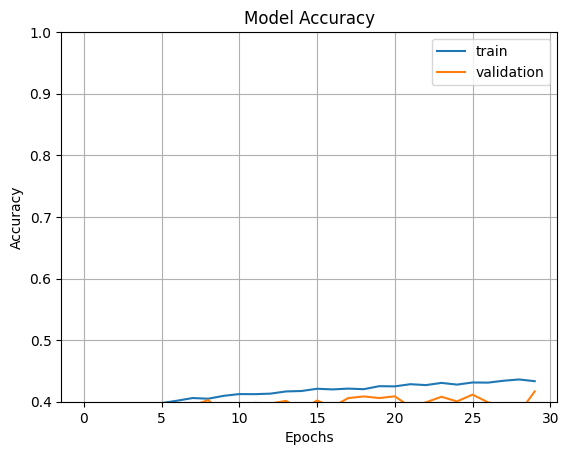

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

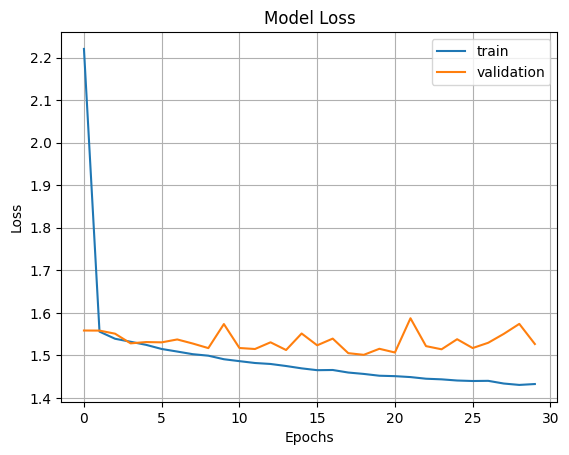

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [14]:
xception_model.evaluate(X_test, y_test)

208/208 [==============================] - 6s 30ms/step - loss: 1.7034 - accuracy: 0.3332


[1.703393578529358, 0.3332330286502838]